#### GUIDING QUESTION:

following Cai's 2013 paper, we explore the impact of mixing between endmembers in the salish sea and its impact on pH and OmegaA

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [4]:
import arrow
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
from importlib import reload
from salishsea_tools import viz_tools

import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

In [5]:
ttemp = 10
tsal = 35
talk = 2.200
tdic_A = 2.190
del_dic = 0.001
tdic_B = tdic_A + del_dic
tzero = 0

def calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, del_dic):

    tdic_B = tdic_A + del_dic
    
    tzero = 0
    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_A, 
                           sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_A,pco2_A,fco2,co2_A,hco3,co3,OmegaA_A,OmegaC,BetaD,DENis,p,Tis = response_tup

    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_B, 
                           sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_B,pco2_B,fco2,co2_B,hco3,co3,OmegaA_B,OmegaC,BetaD,DENis,p,Tis = response_tup

    omega_DIC = 1/((np.log(OmegaA_B)-np.log(OmegaA_A))/(del_dic))
    
    Hplus_A = 10**(-1*pH_A); Hplus_B = 10**(-1*pH_B)
    beta_DIC = 1/((np.log(Hplus_B)-np.log(Hplus_A))/(del_dic))
    
    gamma_DIC = 1/((np.log(co2_B)-np.log(co2_A))/(del_dic))
    
    return omega_DIC, beta_DIC, gamma_DIC



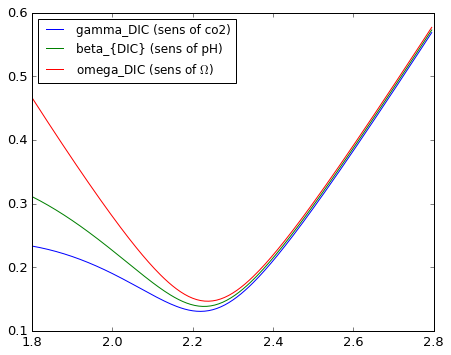

In [6]:
ttemp = 20
tsal = 35
talk = 2.25
dic = np.arange(1.8,2.8,0.005)
omega_DICs = np.zeros_like(dic)
beta_DICs = np.zeros_like(dic)
gamma_DICs = np.zeros_like(dic)
del_dic = 0.010

for i in range(0,len(dic)):
    
    tdic_A = dic[i]
    omega_DIC, beta_DIC, gamma_DIC =\
    calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, del_dic)
    
    omega_DICs[i] = omega_DIC
    beta_DICs[i] = beta_DIC
    gamma_DICs[i] = gamma_DIC
    
# gamma_DICs[79] = np.nan

ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 0.6
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot(1,1,1)

ax1.plot(dic,gamma_DICs, label = 'gamma_DIC (sens of co2)')
ax1.plot(dic,beta_DICs, label = 'beta_{DIC} (sens of pH)')
ax1.plot(dic,-omega_DICs, label = 'omega_DIC (sens of $\Omega$)')
ax1.legend(loc = 'best')
